In [3]:
import json
import sys
import pathlib
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns

cp_data: dict[str, dict] = {}
for file in pathlib.Path('data/shared-dataset/corona_pandemie').rglob('*.ipynb'):
    with open(file) as f:
        cp_data[file.stem.removeprefix('corona_pandemie_')] = json.load(f)

cw_data: dict[str, dict] = {}
for file in pathlib.Path('data/shared-dataset/corona_warn_app_analyse').rglob('*.ipynb'):
    with open(file) as f:
        cw_data[file.stem.removeprefix('corona_warn_app_analyse_')] = json.load(f)

rp_data: dict[str, dict] = {}
for file in pathlib.Path('data/shared-dataset/reproduktionszahl').rglob('*.ipynb'):
    with open(file) as f:
        rp_data[file.stem.removeprefix('reproduktionszahl_')] = json.load(f)

wr_data: dict[str, dict] = {}
for file in pathlib.Path('data/shared-dataset/werbeindustrie').rglob('*.ipynb'):
    with open(file) as f:
        wr_data[file.stem.removeprefix('werbeindustrie_')] = json.load(f)

In [2]:
corona_pandemie_points = pd.read_csv('data/shared-dataset/corona_pandemie_points.csv')
corona_warn_app_analyse_points = pd.read_csv('data/shared-dataset/corona_warn_app_analyse_points.csv')
reproduktionszahl_points = pd.read_csv('data/shared-dataset/reproduktionszahl_points.csv')
werbeindustrie_points = pd.read_csv('data/shared-dataset/werbeindustrie_points.csv')
dfs = {
    "corona_pandemie_points": corona_pandemie_points,
    "corona_warn_app_analyse_points": corona_warn_app_analyse_points,
    "reproduktionszahl_points": reproduktionszahl_points,
    "werbeindustrie_points": werbeindustrie_points
}

In [6]:
def show_execution_count(data):
    """Calculates the total sum of the execution count field from all code cells in a submission."""
    execution_counts: dict[str, int] = {}
    for k, v in data.items():
        execution_counts[k] = 0
        for cell in v['cells']:
            if cell['cell_type'] == 'code' and 'execution_count' in cell:
                if cell['execution_count'] is not None:
                    execution_counts[k] += int(cell['execution_count'])
    return execution_counts

show_execution_count(cp_data)

{'066e': 793,
 '146f': 85,
 '1953': 77,
 '21de': 741,
 '2281': 521,
 '23a6': 1379,
 '3669': 142,
 '44bd': 370,
 '4c2a': 384,
 '4c41': 77,
 '4ca2': 603,
 '63e1': 115,
 '6b4e': 65,
 '6c5b': 367,
 '6f62': 1136,
 '7cc7': 263,
 '88a6': 566,
 '8ac3': 0,
 '8c43': 174,
 '8d45': 601,
 '8eaf': 333,
 '9eb2': 46,
 'a044': 667,
 'abd2': 196,
 'ad47': 406,
 'b14b': 702,
 'b56b': 245,
 'baa4': 399,
 'c926': 217,
 'c938': 1235,
 'cb76': 1093,
 'd28c': 65,
 'eac9': 132,
 'fb4b': 0,
 'fe28': 509}

In [75]:
def examine_execution_count_corr(title: str, points_df: pd.DataFrame, notebook_data: dict[str, dict]):
    dfm: pd.DataFrame = points_df.loc[:, ['id', 'total_points']]
    dfm['execution_count'] = dfm['id'].map(show_execution_count(notebook_data))
    dfm.set_index('id', inplace=True)
    spearman = dfm.corr(method='spearman').iloc[0, 1]
    kendall = dfm.corr(method='kendall').iloc[0, 1]
    print("Spearman:   ", spearman)
    print("Kendall Tau:", kendall)

    fig, ax = plt.subplots(figsize=(10, 6), dpi=90)
    dfm.plot(kind='scatter', x='total_points', y='execution_count', ax=ax)
    fig.suptitle(f"Execution Count vs. Total Points", y=1.05, fontsize=16)
    ax.set_title(f"Exercise: {title}\nCorrelation: {spearman:.2f} (Spearman), {kendall:.2f} (Kendall)", fontsize=11, pad=10)
    plt.show()

Spearman:    -0.0392281258120443
Kendall Tau: -0.04623721517963174


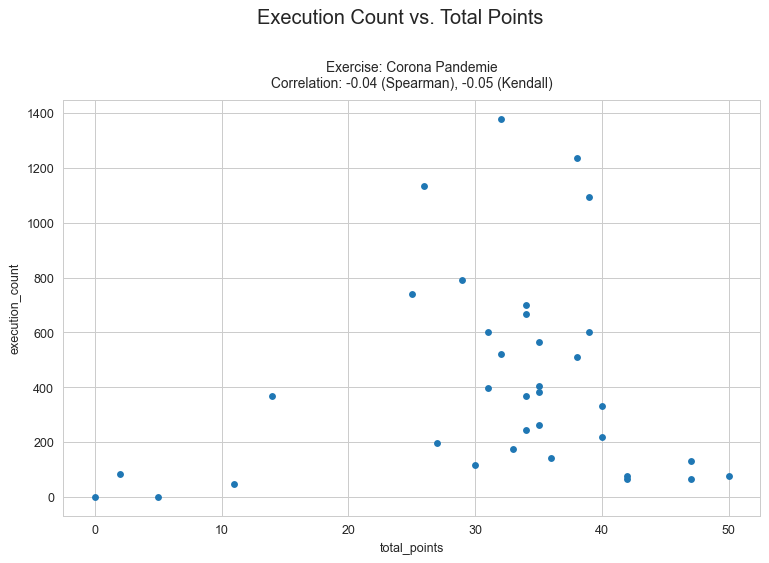

In [76]:
examine_execution_count_corr("Corona Pandemie", corona_pandemie_points, cp_data)

Spearman:    0.3295770318102411
Kendall Tau: 0.25578563292412165


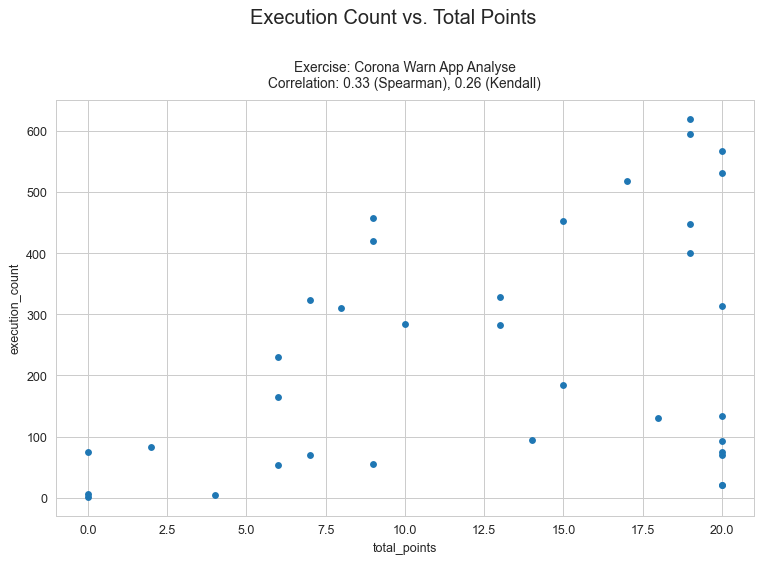

In [77]:
examine_execution_count_corr("Corona Warn App Analyse", corona_warn_app_analyse_points, cw_data)

Spearman:    0.5059389036066988
Kendall Tau: 0.3855660269800248


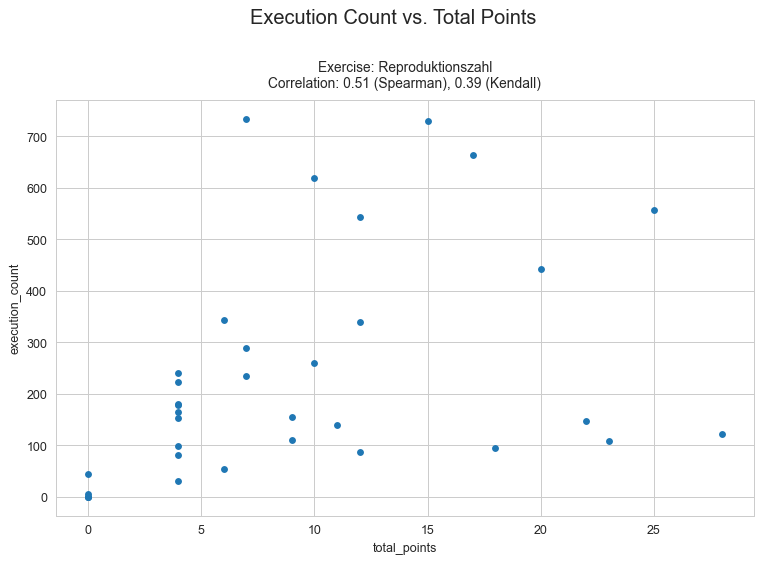

In [78]:
examine_execution_count_corr("Reproduktionszahl", reproduktionszahl_points, rp_data)